<a href="https://colab.research.google.com/github/duttaprat/BMI_Bootcamp_2023/blob/master/kmeans_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from matplotlib.pyplot import style
style.use("seaborn-darkgrid")

<ipython-input-24-1f66c8b243e3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-darkgrid")


## Importing Kmeans function from sklearn package

In [ ]:
from sklearn.cluster import KMeans

## Importing silhouette score which act as a cluster validity index for unlabeled data

In [ ]:
from sklearn.metrics import silhouette_score

## Load the 2D data which is a user input

In [ ]:
all_data = np.array([[1, 2], [5,8], [1.5, 1.8] ,[8,8], [9,11], [10,1], [7,5], [9,2], [3,7]])
a = all_data
print (a)

[[ 1.   2. ]
 [ 5.   8. ]
 [ 1.5  1.8]
 [ 8.   8. ]
 [ 9.  11. ]
 [10.   1. ]
 [ 7.   5. ]
 [ 9.   2. ]
 [ 3.   7. ]]


## Call the Kmeans function and train the data

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## Obtain centroids and labels as parameters

In [ ]:
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[6.4   7.8  ]
 [5.375 1.7  ]]
Labels : [1 0 1 0 0 1 0 1 0]


## Plotting the data and their clusters

<ipython-input-9-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "m." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
<ipython-input-9-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )


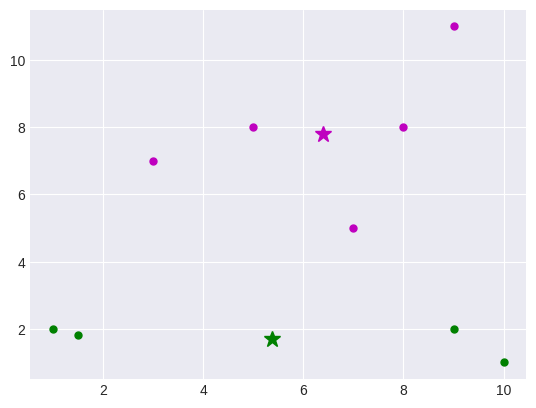

In [ ]:
colours = ['m.','g.','r.', 'k.']
for i in range(len(a)):
    #print "Coordinates ", a[i], "labels", label[i]
    plot.plot(a[i][0], a[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()

## Calculate the cluster goodness using Silhoutte score
* The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`.
  *  `a` is the mean intra-cluster distance
  *  `b` is the distance between a sample and the nearest cluster that the sample is not a part of.

In [ ]:
Sil_score=silhouette_score(a,label)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.33796436328535506


# Now we will load unlabeled data from file. Preprocessing the data from the file is the main task. All the remaining part is same as previous method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
read_file=open("/content/drive/MyDrive/BMI Bootcamp/Session 2: Biomedical Data Analytics and Machine Learning/Day 3 : 07 Sep/clustering/data/2D_data.txt",'r')
read_content= read_file.read()


## Getting number of data points and number of features/samples for each data point

In [ ]:
all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  2


## Loading the whole dataset in a 2D matrix

In [ ]:
a=np.zeros((No_data_points,No_of_features))
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        a[counter][i]= values[i]
    counter+=1

print (a)    # If you want to see the whole dataset

[[5.1 3.5]
 [7.  3.2]
 [6.3 3.3]
 [4.9 3. ]
 [6.4 3.2]
 [5.8 2.7]
 [4.7 3.2]
 [6.9 3.1]
 [7.1 3. ]
 [4.6 3.1]
 [5.5 2.3]
 [6.3 2.9]
 [5.  3.6]
 [6.5 2.8]
 [6.5 3. ]
 [5.4 3.9]
 [5.7 2.8]
 [7.6 3. ]
 [4.6 3.4]
 [6.3 3.3]
 [4.9 2.5]
 [5.  3.4]
 [4.9 2.4]
 [7.3 2.9]
 [4.4 2.9]
 [6.6 2.9]
 [6.7 2.5]
 [4.9 3.1]
 [5.2 2.7]
 [7.2 3.6]
 [5.4 3.7]
 [5.  2. ]
 [6.5 3.2]
 [4.8 3.4]
 [5.9 3. ]
 [6.4 2.7]
 [4.8 3. ]
 [6.  2.2]
 [6.8 3. ]
 [4.3 3. ]
 [6.1 2.9]
 [5.7 2.5]
 [5.8 4. ]
 [5.6 2.9]
 [5.8 2.8]
 [5.7 4.4]
 [6.7 3.1]
 [6.4 3.2]
 [5.4 3.9]
 [5.6 3. ]
 [6.5 3. ]
 [5.1 3.5]
 [5.8 2.7]
 [7.7 3.8]
 [5.7 3.8]
 [6.2 2.2]
 [7.7 2.6]
 [5.1 3.8]
 [5.6 2.5]
 [6.  2.2]
 [5.4 3.4]
 [5.9 3.2]
 [6.9 3.2]
 [5.1 3.7]
 [6.1 2.8]
 [5.6 2.8]
 [4.6 3.6]
 [6.3 2.5]
 [7.7 2.8]
 [5.1 3.3]
 [6.1 2.8]
 [6.3 2.7]
 [4.8 3.4]
 [6.4 2.9]
 [6.7 3.3]
 [5.  3. ]
 [6.6 3. ]
 [7.2 3.2]
 [5.  3.4]
 [6.8 2.8]
 [6.2 2.8]
 [5.2 3.5]
 [6.7 3. ]
 [6.1 3. ]
 [5.2 3.4]
 [6.  2.9]
 [6.4 2.8]
 [4.7 3.2]
 [5.7 2.6]
 [7.2 3. ]
 [4.8 3.1]

## Call the Kmeans function and train the data

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## Obtain centroids and labels as parameters

In [ ]:
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]
Labels : [1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1
 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1
 1 1]


## Plotting the data and their clusters

<ipython-input-22-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "m." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
<ipython-input-22-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )


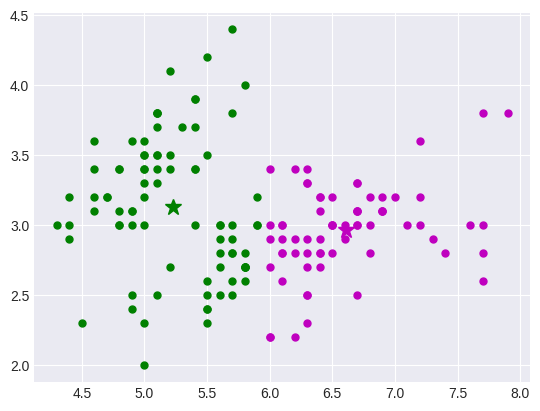

In [ ]:
colours = ['m.','g.','r.', 'k.']
for i in range(len(a)):
    #print "Coordinates ", a[i], "labels", label[i]
    plot.plot(a[i][0], a[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()

In [ ]:
Sil_score=silhouette_score(a,label)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.4629549773635977


## load the data as `pandas dataframe` and apply `k-means` clustering  

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/BMI Bootcamp/Session 2: Biomedical Data Analytics and Machine Learning/Day 3 : 07 Sep/clustering/data/2D_data.txt",sep='\t', header=None)
data

,0,1
0,5.1,3.5
1,7.0,3.2
2,6.3,3.3
3,4.9,3.0
4,6.4,3.2
...,...,...
145,5.1,2.5
146,6.2,3.4
147,5.0,3.3
148,5.7,2.8


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[5.22409639 3.1313253 ]
 [6.61044776 2.96567164]]
Labels : [0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0
 0 0]


<ipython-input-31-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "m." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
<ipython-input-31-77a8125db8a3>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )


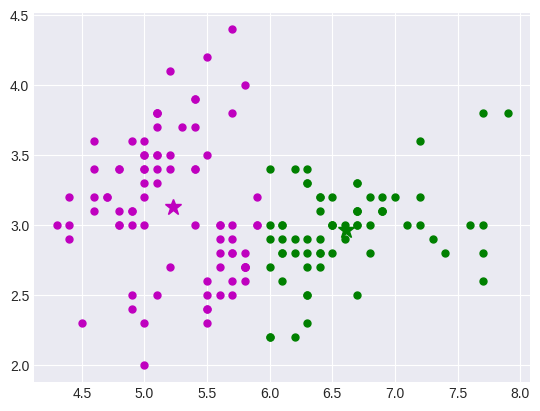

In [ ]:
colours = ['m.','g.','r.', 'k.']
for i in range(len(a)):
    #print "Coordinates ", a[i], "labels", label[i]
    plot.plot(a[i][0], a[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()